In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
# No need for pad_sequences or to_categorical as data is not sequential

# Load your dataset
df_inp = pd.read_csv('/content/exer_24_pipe_apexdata_w16_deg.csv')  # Replace with your actual file path
df_inp

,left_arm,right_arm,left_elbow,right_elbow,left_waist_leg,right_waist_leg,left_knee,right_knee,leftup_chest_inside,rightup_chest_inside,leftlow_chest_inside,rightlow_chest_inside,leg_spread,label
0,99.791083,104.561564,18.592105,21.530111,14.771807,6.665352,0.478822,4.665643,98.86266243375084,95.267133,84.328215,88.36442076985661,147.954762,band_pull_apart
1,99.930689,105.079678,18.314072,22.197135,14.776227,6.621307,0.575952,4.722163,98.95803538008664,95.180984,84.388408,88.35307786583309,148.024015,band_pull_apart
2,100.180872,105.305748,18.174394,22.274754,14.795877,6.591753,0.630954,4.745525,99.12556307204436,95.031493,84.430738,88.33868889984937,148.067934,band_pull_apart
3,100.615233,105.675975,18.145478,22.310703,14.749385,6.592474,0.703478,4.731019,99.30811168477318,94.832624,84.360753,88.43812312554617,148.115305,band_pull_apart
4,100.995374,106.104506,18.226703,22.801311,14.736524,6.613575,0.722210,4.759234,99.44043547801688,94.723182,84.387739,88.42578086009722,148.168127,band_pull_apart
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24640,156.022389,161.043916,9.628026,13.293735,11.899737,52.193560,9.100314,61.246534,92.28875590534824,104.388159,81.140661,51.44295745096554,110.177181,side_lateral_raise
24641,157.064261,161.798125,9.498217,14.401510,11.828078,52.239677,8.944823,61.338401,92.12003291787886,104.551884,81.110830,51.49333141898064,110.195545,side_lateral_raise
24642,157.545438,162.052644,10.326757,14.325911,11.924535,52.252804,9.000141,61.365905,91.97487888583412,104.742067,80.861330,51.67827591588262,110.168261,side_lateral_raise
24643,157.700903,162.138877,10.411369,14.230774,12.135425,52.258936,9.120260,61.338009,91.87012182091588,104.924022,80.573199,51.82658319988666,110.108650,side_lateral_raise


In [28]:
df_inp.shape

(24645, 14)

In [29]:
df = df_inp.dropna()
df.shape

(24643, 14)

In [31]:
# Extract features and labels
X_inp = df.iloc[:, :13].values  # Select first 13 numeric columns as features
y_inp = df['label'].values  # Select 'exercise' column as string labels

In [32]:
df['label'].unique()

array(['band_pull_apart', 'barbell_dead_row', 'barbell_row',
       'barbell_shrug', 'burpees', 'clean_and_press', 'deadlift',
       'diamond_pushup', 'drag_curl', 'dumbbell_biceps_curls',
       'dumbbell_curl_trifecta', 'dumbbell_hammer_curls',
       'dumbbell_high_pulls', 'dumbbell_overhead_shoulder_press',
       'dumbbell_reverse_lunge', 'dumbbell_scaptions', 'man_maker',
       'mule_kick', 'neutral_overhead_shoulder_press', 'one_arm_row',
       'overhead_extension_thruster', 'overhead_trap_raises', 'pushup',
       'side_lateral_raise'], dtype=object)

In [33]:
X_inp

array([[99.79108251354936, 104.5615637075104, 18.592104864028112, ...,
        84.32821548713218, '88.36442076985661', 147.9547620116382],
       [99.93068862653864, 105.07967772453246, 18.314071897591862, ...,
        84.38840820803316, '88.35307786583309', 148.0240146625705],
       [100.18087153359608, 105.30574837036065, 18.17439354943868, ...,
        84.43073777292642, '88.33868889984937', 148.0679342298895],
       ...,
       [157.5454377841161, 162.05264405658514, 10.326757124258526, ...,
        80.86133007737027, '51.67827591588262', 110.16826085977932],
       [157.70090300573722, 162.1388768304058, 10.411368622178877, ...,
        80.57319948668636, '51.82658319988666', 110.10865040669744],
       [158.09794648664936, 161.88356286603573, 10.82787847862599, ...,
        80.40968626686414, '51.803617077183326', 109.98484860302712]],
      dtype=object)

In [34]:
# Convert all values to float
X_float = np.empty_like(X_inp, dtype=float)

for i in range(X_inp.shape[0]):
    for j in range(X_inp.shape[1]):
        try:
            X_float[i, j] = float(X_inp[i, j])
        except ValueError:
            # Handle the case where the value cannot be converted to float
            X_float[i, j] = np.nan  # or any other appropriate handling

# X_float now contains all values, including strings, converted to float
X_float

array([[ 99.79108251, 104.56156371,  18.59210486, ...,  84.32821549,
         88.36442077, 147.95476201],
       [ 99.93068863, 105.07967772,  18.3140719 , ...,  84.38840821,
         88.35307787, 148.02401466],
       [100.18087153, 105.30574837,  18.17439355, ...,  84.43073777,
         88.3386889 , 148.06793423],
       ...,
       [157.54543778, 162.05264406,  10.32675712, ...,  80.86133008,
         51.67827592, 110.16826086],
       [157.70090301, 162.13887683,  10.41136862, ...,  80.57319949,
         51.8265832 , 110.10865041],
       [158.09794649, 161.88356287,  10.82787848, ...,  80.40968627,
         51.80361708, 109.9848486 ]])

In [35]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler(feature_range=(0,1))
# X = scaler.fit_transform(X_inp)
# X

# Convert angles to radians
X = np.radians(X_float)
X

array([[1.74168295, 1.82494356, 0.32449344, ..., 1.47180501, 1.54225008,
        2.58229774],
       [1.74411954, 1.83398635, 0.31964085, ..., 1.47285557, 1.54205211,
        2.58350643],
       [1.74848606, 1.83793203, 0.31720301, ..., 1.47359436, 1.54180098,
        2.58427297],
       ...,
       [2.74968661, 2.8283522 , 0.18023591, ..., 1.41129645, 0.90195607,
        1.92279888],
       [2.75239999, 2.82985725, 0.18171266, ..., 1.40626762, 0.90454452,
        1.92175848],
       [2.75932971, 2.82540118, 0.18898213, ..., 1.40341378, 0.90414368,
        1.91959774]])

In [36]:
# Convert labels to categorical integers using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y_inp)
y

array([ 0,  0,  0, ..., 23, 23, 23])

In [37]:
# Get the mapping of original labels to encoded integers
label_mapping = dict(zip(le.classes_, range(len(le.classes_))))

# Print the mapping
print("Label Mapping:")
for label, encoded_value in label_mapping.items():
    print(f"{label}: {encoded_value}")

Label Mapping:
band_pull_apart: 0
barbell_dead_row: 1
barbell_row: 2
barbell_shrug: 3
burpees: 4
clean_and_press: 5
deadlift: 6
diamond_pushup: 7
drag_curl: 8
dumbbell_biceps_curls: 9
dumbbell_curl_trifecta: 10
dumbbell_hammer_curls: 11
dumbbell_high_pulls: 12
dumbbell_overhead_shoulder_press: 13
dumbbell_reverse_lunge: 14
dumbbell_scaptions: 15
man_maker: 16
mule_kick: 17
neutral_overhead_shoulder_press: 18
one_arm_row: 19
overhead_extension_thruster: 20
overhead_trap_raises: 21
pushup: 22
side_lateral_raise: 23


In [38]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [55]:
# Define the LSTM model (adjust input_shape)
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))  # Note: (13, 1) for 1D input
model.add(Dropout(0.13))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(le.classes_), activation='softmax'))  # Output for all classes

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [56]:
# Train the model
his = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/40
617/617 [==============================] - 5s 6ms/step - loss: 2.5909 - accuracy: 0.2655 - val_loss: 2.2259 - val_accuracy: 0.3372
Epoch 2/40
617/617 [==============================] - 3s 5ms/step - loss: 2.0482 - accuracy: 0.3689 - val_loss: 1.8965 - val_accuracy: 0.4100
Epoch 3/40
617/617 [==============================] - 3s 5ms/step - loss: 1.7580 - accuracy: 0.4285 - val_loss: 1.6257 - val_accuracy: 0.4553
Epoch 4/40
617/617 [==============================] - 5s 8ms/step - loss: 1.6055 - accuracy: 0.4681 - val_loss: 1.7036 - val_accuracy: 0.4739
Epoch 5/40
617/617 [==============================] - 4s 6ms/step - loss: 1.4959 - accuracy: 0.4980 - val_loss: 1.3961 - val_accuracy: 0.5210
Epoch 6/40
617/617 [==============================] - 3s 5ms/step - loss: 1.3753 - accuracy: 0.5376 - val_loss: 1.3550 - val_accuracy: 0.5464
Epoch 7/40
617/617 [==============================] - 3s 5ms/step - loss: 1.2884 - accuracy: 0.5683 - val_loss: 1.1610 - val_accuracy: 0.6097
Epoch 

In [57]:
# Evaluate the model
accuracy = model.evaluate(X_test, y_test)[1]
print(f"Test Accuracy: {accuracy}")

155/155 [==============================] - 0s 2ms/step - loss: 0.4574 - accuracy: 0.8302
Test Accuracy: 0.8301886916160583


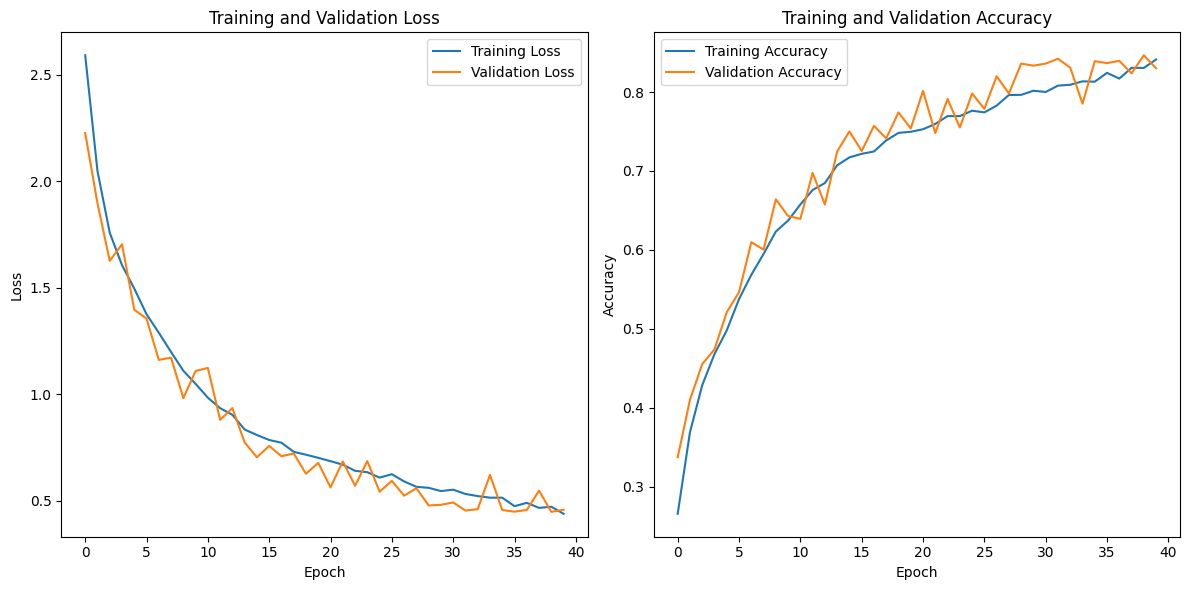

In [58]:
import matplotlib.pyplot as plt

# Assuming 'his' is a dictionary containing the training history
# 'his' might look like {'loss': [...], 'val_loss': [...], 'accuracy': [...], 'val_accuracy': [...]}

# Plot training and validation loss
plt.figure(figsize=(12, 6))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(his.history['loss'], label='Training Loss')
plt.plot(his.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(his.history['accuracy'], label='Training Accuracy')
plt.plot(his.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [63]:
model.save('exer24_apex_pipe_w16degtorad.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [62]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical

# Assuming you have loaded the model as 'loaded_model'
# Assuming X_test is your test data and y_test is your true labels

# Load the model
loaded_model = load_model('/content/exer24_apex_pipe_w16degtorad.h5')

# Use the loaded model for predictions
predictions = loaded_model.predict(X_test)

# Apply softmax activation to the predictions
softmax_predictions = np.argmax(predictions, axis=1)

# Convert true labels to categorical if not already
y_test_categorical = to_categorical(y_test)

# Convert true labels to indices
true_labels = np.argmax(y_test_categorical, axis=1)

# Map indices to labels (replace label_map with your actual label mapping)
label_map = {
    0: 'band_pull_apart',
    1: 'barbell_dead_row',
    2: 'barbell_row',
    3: 'barbell_shrug',
    4: 'burpees',
    5: 'clean_and_press',
    6: 'deadlift',
    7: 'diamond_pushup',
    8: 'drag_curl',
    9: 'dumbbell_biceps_curls',
    10: 'dumbbell_curl_trifecta',
    11: 'dumbbell_hammer_curls',
    12: 'dumbbell_high_pulls',
    13: 'dumbbell_overhead_shoulder_press',
    14: 'dumbbell_reverse_lunge',
    15: 'dumbbell_scaptions',
    16: 'man_maker',
    17: 'mule_kick',
    18: 'neutral_overhead_shoulder_press',
    19: 'one_arm_row',
    20: 'overhead_extension_thruster',
    21: 'overhead_trap_raises',
    22: 'pushup',
    23: 'side_lateral_raise'
}

# Map predicted and true labels to class names
predicted_labels = [label_map[idx] for idx in softmax_predictions]
true_labels_mapped = [label_map[idx] for idx in true_labels]

# Print the first few predictions and true labels
for i in range(40):
    print(f"Example {i + 1}: Predicted = {predicted_labels[i]}, True Label = {true_labels_mapped[i]}")

155/155 [==============================] - 1s 2ms/step
Example 1: Predicted = pushup, True Label = pushup
Example 2: Predicted = dumbbell_curl_trifecta, True Label = dumbbell_curl_trifecta
Example 3: Predicted = dumbbell_curl_trifecta, True Label = dumbbell_curl_trifecta
Example 4: Predicted = drag_curl, True Label = drag_curl
Example 5: Predicted = overhead_trap_raises, True Label = overhead_trap_raises
Example 6: Predicted = dumbbell_scaptions, True Label = dumbbell_scaptions
Example 7: Predicted = overhead_trap_raises, True Label = overhead_trap_raises
Example 8: Predicted = dumbbell_reverse_lunge, True Label = dumbbell_reverse_lunge
Example 9: Predicted = dumbbell_high_pulls, True Label = dumbbell_high_pulls
Example 10: Predicted = barbell_row, True Label = barbell_row
Example 11: Predicted = burpees, True Label = burpees
Example 12: Predicted = dumbbell_curl_trifecta, True Label = dumbbell_curl_trifecta
Example 13: Predicted = one_arm_row, True Label = one_arm_row
Example 14: Pred